<a href="https://colab.research.google.com/github/Tilence/Credit-Card-Fraudlent/blob/master/Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROGRAMMERS: ANNIE NCUBE  R195909U
           : TINOTENDA NGWARU R195893X
           : KUZIVAKWASHE MATIMBE R195835X

IMPORTING MODULES

In [66]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
LABELS = ["Normal", "Fraud"]
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42





importing our CVS file 

In [ ]:
 #loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('/content/credit_card_data.csv')

In [ ]:
 #first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


credit card details are very sensitive so we use v1 upto v28 as our columns title .They are encrypted to numbers so as to keep customers details unanomously .
time represent time elpse between transaction .

In [ ]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
17913,29027,-0.422159,0.231118,1.666711,0.451976,-0.203598,0.097244,-0.039666,0.354218,0.062463,-0.267672,0.909700,-0.078854,-2.186030,0.421409,-0.291018,-0.948596,0.715232,-0.080037,1.303620,-0.035462,0.110909,0.435121,-0.056658,0.265867,-0.548204,0.734013,0.117023,0.130972,9.00,0.0
17914,29030,1.177387,-0.215585,0.202972,0.215323,-0.029312,0.601788,-0.297021,0.188082,0.436370,-0.199326,0.515916,1.246514,0.457754,-0.118306,-0.778808,-0.268287,-0.163576,-0.353358,0.553504,-0.035901,-0.055842,0.075903,-0.187120,-0.717798,0.555294,0.731531,-0.022112,-0.010929,25.00,0.0
17915,29030,-0.553746,0.880858,1.644821,-0.132657,0.120940,-0.267411,0.466892,0.222443,-0.639624,-0.174843,1.671591,0.700839,-0.287896,0.417781,0.406584,0.049476,-0.279782,-0.349309,-0.129659,0.070172,-0.133339,-0.348662,0.029947,0.199962,-0.328384,0.071511,0.275487,0.110195,0.89,0.0
17916,29030,-2.844632,3.717960,-7.165428,4.120419,-2.991039,-2.942326,-4.925187,2.204337,-2.663613,-6.888367,4.027447,-8.030026,-1.340344,-9.756963,1.055533,-5.381310,-8.745070,-2.733419,0.983641,0.800709,0.894495,-0.340246,0.012222,-0.059679,-0.104338,-0.295884,1.326228,0.322688,89.99,0.0
17917,29031,1.050204,0.078269,0.484733,1.349623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
 #dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17918 entries, 0 to 17917
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    17918 non-null  int64  
 1   V1      17918 non-null  float64
 2   V2      17918 non-null  float64
 3   V3      17918 non-null  float64
 4   V4      17918 non-null  float64
 5   V5      17917 non-null  float64
 6   V6      17917 non-null  float64
 7   V7      17917 non-null  float64
 8   V8      17917 non-null  float64
 9   V9      17917 non-null  float64
 10  V10     17917 non-null  float64
 11  V11     17917 non-null  float64
 12  V12     17917 non-null  float64
 13  V13     17917 non-null  float64
 14  V14     17917 non-null  float64
 15  V15     17917 non-null  float64
 16  V16     17917 non-null  float64
 17  V17     17917 non-null  float64
 18  V18     17917 non-null  float64
 19  V19     17917 non-null  float64
 20  V20     17917 non-null  float64
 21  V21     17917 non-null  float64
 22

In [ ]:
 #checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
credit_card_data = credit_card_data.dropna(subset=['V26','V27','V28','Amount','Class'])


In [ ]:
#checking the null values again after droping them.
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

0.0    17836
1.0       81
Name: Class, dtype: int64

In [ ]:
## Get the Fraud and the normal dataset 

fraud = credit_card_data[credit_card_data['Class']==1.0]

normal = credit_card_data[credit_card_data['Class']==0.0]

This Dataset is highly unblanced

0.0 --> Normal Transaction

1.0 --> fraudulent transaction

In [ ]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0.0]
Fraud = credit_card_data[credit_card_data.Class == 1.0]

In [ ]:
print(legit.shape)
print(fraud.shape)

(17836, 31)
(81, 31)


In [ ]:
# statistical measures of the data
legit.Amount.describe()

count    17836.000000
mean        67.365025
std        188.754429
min          0.000000
25%          5.490000
50%         15.950000
75%         56.232500
max       7712.430000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count      81.000000
mean       98.105926
std       267.464067
min         0.000000
25%         1.000000
50%         1.000000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
 #compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,13891.131980,-0.203851,0.228560,0.840631,0.263581,-0.117213,0.112151,-0.110725,-0.008454,0.752065,-0.215358,0.712585,-1.186843,0.781491,0.672759,-0.082770,0.008721,0.354174,-0.026752,-0.073561,0.032646,-0.054930,-0.144997,-0.036871,0.015838,0.118904,0.035813,0.010352,0.006670,67.365025
1.0,16833.074074,-9.315066,6.779465,-13.052870,6.451318,-6.557541,-2.602613,-9.012856,4.730365,-3.087651,-7.499402,6.173253,-9.366936,0.530956,-8.907345,-0.187449,-5.282956,-8.522760,-3.021430,0.395198,0.756424,0.549752,-0.423495,-0.398104,-0.277836,0.355688,0.177616,0.940693,0.090007,98.105926


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [ ]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
10310,16323,1.152882,0.200199,0.414273,1.410323,0.062269,0.355886,-0.203861,0.128066,1.485124,-0.296257,1.651332,-1.910398,0.516059,1.868700,-1.402334,-0.415277,0.680796,0.015543,-0.150165,-0.279441,-0.235046,-0.268181,-0.089132,-0.375028,0.622234,-0.344959,0.003129,-0.006452,5.53,0.0
15892,27333,0.625077,-0.705214,-0.085419,1.320438,-0.466116,-0.414090,0.468652,-0.115784,0.093747,-0.138739,-0.336285,-0.240669,-0.959570,0.682058,1.317596,-0.158017,-0.082071,-0.418395,-0.817695,0.367305,0.224211,0.002883,-0.320011,0.074676,0.471892,-0.327169,-0.032521,0.066685,302.18,0.0
4746,4188,-0.491036,1.422944,2.093633,2.785801,0.710413,0.183324,0.844289,-0.552050,0.282561,1.127047,0.264228,-3.165903,2.041274,1.133229,0.645420,-0.057430,0.292132,0.233422,0.862195,0.316774,-0.464107,-0.678181,-0.041782,-0.213121,-0.416064,-0.125818,-0.218193,-0.263162,7.61,0.0
4003,3642,1.137227,-0.004168,0.736363,1.004318,-0.646759,-0.476669,-0.266511,-0.019929,1.653650,-0.370138,1.962248,-1.910535,0.292459,1.816190,-1.529998,-0.116125,0.656428,0.139260,0.229587,-0.193146,-0.318746,-0.630429,0.033863,0.487558,0.325825,0.201891,-0.064337,-0.000533,27.43,0.0
14928,26234,0.023954,-2.243271,0.514594,0.644136,-1.333284,1.094672,-0.219114,0.375410,0.885601,-0.546533,1.254178,1.150177,-0.597427,-0.070502,-0.412896,-0.379078,0.484089,-0.869533,-0.208681,0.937202,0.198202,-0.401040,-0.344311,-0.203812,-0.256090,0.896444,-0.108371,0.091699,552.19,0.0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
17317,28625,-27.848181,15.598193,-28.923756,6.418442,-20.346228,-4.828202,-19.210896,18.329406,-3.668735,-8.009159,4.303096,-6.008660,1.138969,-5.580447,-0.110737,-5.491073,-11.588544,-4.715420,0.734573,1.697856,1.802149,-2.062934,-1.269843,0.165409,1.999499,-0.211059,1.324809,0.388090,99.99,1.0
17366,28658,-28.524268,15.876923,-29.468732,6.447591,-20.786000,-4.865613,-19.501084,18.748872,-3.642990,-7.939642,4.184674,-5.835075,1.215960,-5.330144,-0.118631,-5.367775,-11.431757,-4.696924,0.692688,1.706889,1.805770,-2.119376,-1.317450,0.169846,2.051687,-0.210502,1.301734,0.380246,99.99,1.0
17407,28692,-29.200329,16.155701,-30.013712,6.476731,-21.225810,-4.902997,-19.791248,19.168327,-3.617242,-7.870122,4.066255,-5.661492,1.292950,-5.079846,-0.126523,-5.244472,-11.274973,-4.678437,0.650807,1.715862,1.809371,-2.175815,-1.365104,0.174286,2.103868,-0.209944,1.278681,0.372393,99.99,1.0
17453,28726,-29.876366,16.434525,-30.558697,6.505862,-21.665654,-4.940356,-20.081391,19.587773,-3.591491,-7.800598,3.947840,-5.487911,1.369940,-4.829552,-0.134412,-5.121162,-11.118190,-4.659956,0.608930,1.724779,1.812954,-2.232252,-1.412803,0.178731,2.156042,-0.209385,1.255649,0.364530,99.99,1.0
17480,28755,-30.552380,16.713389,-31.103685,6.534984,-22.105532,-4.977692,-20.371514,20.007208,-3.565738,-7.731071,3.829427,-5.314332,1.446930,-4.579264,-0.142299,-4.997848,-10.961410,-4.641482,0.567056,1.733644,1.816520,-2.288686,-1.460544,0.183179,2.208209,-0.208824,1.232636,0.356660,99.99,1.0


In [ ]:
new_dataset['Class'].value_counts()

0.0    492
1.0     81
Name: Class, dtype: int64

In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,14364.337398,-0.177655,0.307588,0.781604,0.288939,-0.086678,0.063393,-0.011881,-0.026373,0.657635,-0.170126,0.771220,-1.115285,0.776638,0.589318,0.016882,0.020661,0.338292,-0.048809,-0.039945,0.092006,-0.071764,-0.145470,-0.058178,0.038265,0.084215,0.040528,0.026581,0.011325,73.248354
1.0,16833.074074,-9.315066,6.779465,-13.052870,6.451318,-6.557541,-2.602613,-9.012856,4.730365,-3.087651,-7.499402,6.173253,-9.366936,0.530956,-8.907345,-0.187449,-5.282956,-8.522760,-3.021430,0.395198,0.756424,0.549752,-0.423495,-0.398104,-0.277836,0.355688,0.177616,0.940693,0.090007,98.105926


Splitting the data into Features & Targets

In [ ]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
print(X)

        Time         V1         V2  ...       V27       V28  Amount
10310  16323   1.152882   0.200199  ...  0.003129 -0.006452    5.53
15892  27333   0.625077  -0.705214  ... -0.032521  0.066685  302.18
4746    4188  -0.491036   1.422944  ... -0.218193 -0.263162    7.61
4003    3642   1.137227  -0.004168  ... -0.064337 -0.000533   27.43
14928  26234   0.023954  -2.243271  ... -0.108371  0.091699  552.19
...      ...        ...        ...  ...       ...       ...     ...
17317  28625 -27.848181  15.598193  ...  1.324809  0.388090   99.99
17366  28658 -28.524268  15.876923  ...  1.301734  0.380246   99.99
17407  28692 -29.200329  16.155701  ...  1.278681  0.372393   99.99
17453  28726 -29.876366  16.434525  ...  1.255649  0.364530   99.99
17480  28755 -30.552380  16.713389  ...  1.232636  0.356660   99.99

[573 rows x 30 columns]


In [ ]:
print(X)

        Time        V1        V2  ...       V27       V28  Amount
39344  39800  1.144230  0.447206  ...  0.013434  0.023671   11.39
64653  51248 -2.607227  2.707658  ...  0.710465  0.447200    8.99
37259  38882  1.254972  0.515290  ...  0.039825  0.036879    1.00
43741  41637  1.111952 -0.211468  ...  0.062167  0.018820   47.00
29127  35333  0.717420 -2.170966  ...  0.073316  0.061172  299.96
...      ...       ...       ...  ...       ...       ...     ...
68633  53076  1.296231  0.417447  ...  0.032838  0.020600    1.18
69498  53451  0.385108  1.217620  ...  0.599482  0.288916    8.00
69980  53658 -1.739341  1.344521  ...  0.510729  0.220952    0.00
70141  53727 -1.649279  1.263974  ...  0.390809  0.112146  112.45
70589  53937 -2.042608  1.573578  ...  0.606097  0.171697  261.87

[669 rows x 30 columns]


In [ ]:
print(Y)

10310    0.0
15892    0.0
4746     0.0
4003     0.0
14928    0.0
        ... 
17317    1.0
17366    1.0
17407    1.0
17453    1.0
17480    1.0
Name: Class, Length: 573, dtype: float64


Split the data into Training data & Testing Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(573, 30) (458, 30) (115, 30)


Model Training

Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Model Evaluation

Accuracy Store

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9781659388646288


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9739130434782609


Text(0, 0.5, 'Frequency')

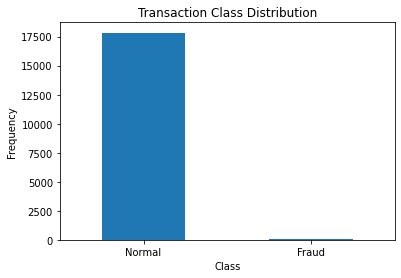

In [ ]:
count_classes = pd.value_counts(credit_card_data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim(0, 20000))
plt.yscale('log')
plt.show();

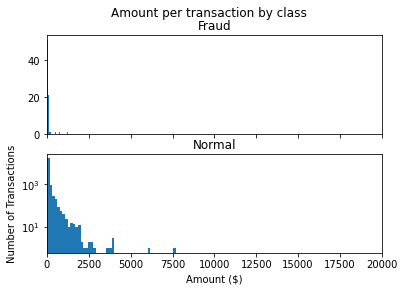

In [ ]:

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

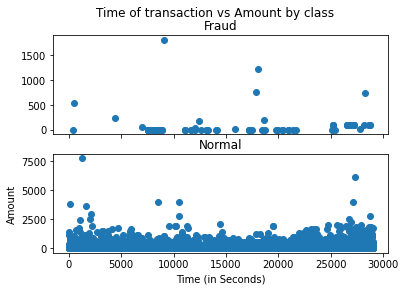

In [ ]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(Fraud.Time, Fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [ ]:
## Take some sample of the data

creditcard= credit_card_data.sample(frac = 0.1,random_state=1)

creditcard.shape

(1792, 31)

In [ ]:
credit_card_data.shape

(17918, 31)

In [ ]:

#Determine the number of fraud and valid transactions in the dataset

Fraud = creditcard[creditcard['Class']==1]

Valid = creditcard[creditcard['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

In [ ]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.00392156862745098
Fraud Cases : 7
Valid Cases : 1785


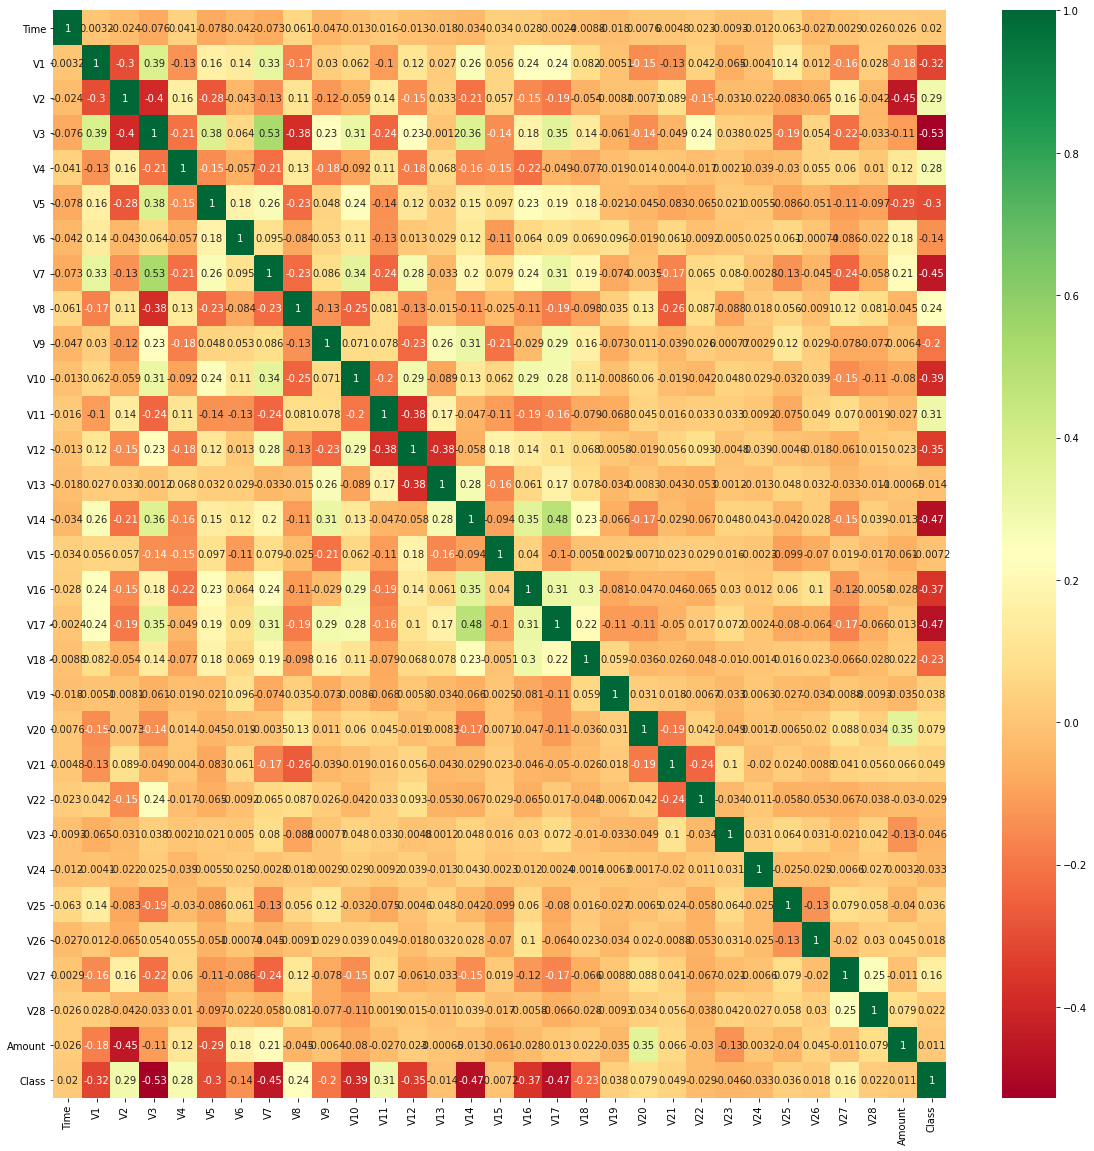

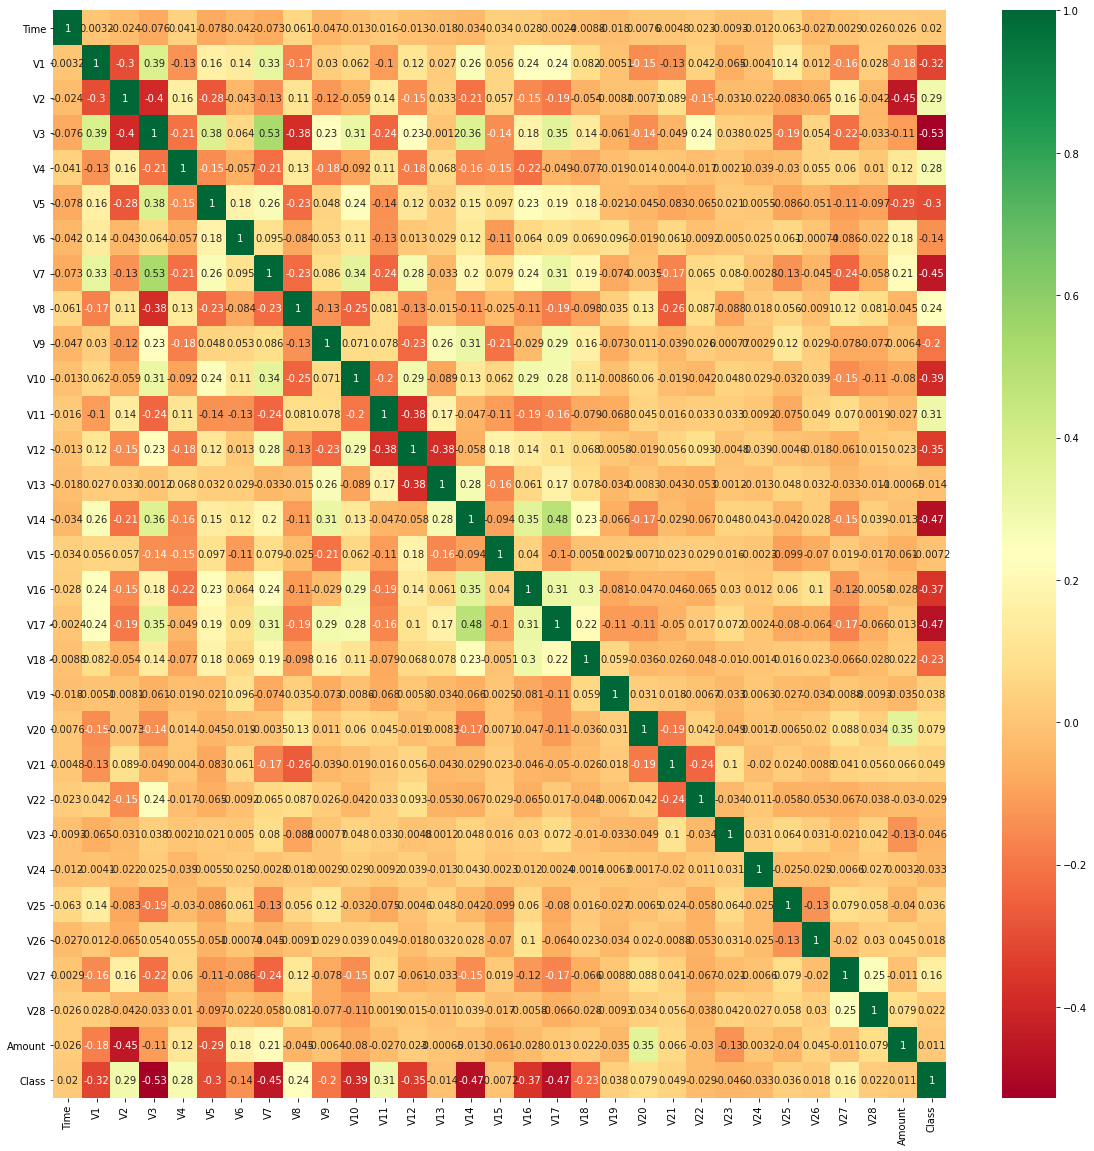

In [ ]:
## Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = creditcard.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(credit_card_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
#Create independent and Dependent Features
columns = creditcard.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = creditcard[columns]
Y = creditcard[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(1792, 30)
(1792,)


Model Prediction

In [69]:
!pip install Sklearn

In [71]:
!pip install spicy

In [73]:
import sklearn
print(sklearn.__version__)

0.22.2.post1


In [79]:

##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1,)
    }
   

In [80]:
type(classifiers)

dict

In [81]:
n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

Isolation Forest: 7
Accuracy Score :
0.99609375
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1785
         1.0       0.50      0.57      0.53         7

    accuracy                           1.00      1792
   macro avg       0.75      0.78      0.77      1792
weighted avg       1.00      1.00      1.00      1792

Local Outlier Factor: 15
Accuracy Score :
0.9916294642857143
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1785
         1.0       0.00      0.00      0.00         7

    accuracy                           0.99      1792
   macro avg       0.50      0.50      0.50      1792
weighted avg       0.99      0.99      0.99      1792

Support Vector Machine: 751
Accuracy Score :
0.5809151785714286
Classification Report :
              precision    recall  f1-score   support

         0.0       0.99      0.58      0.73   